# SYNTHETIC DATASET GENERATION 

In [1]:
import os
import sys
sys.path.append('../')
import pickle
from utils_reboot.utils import *
from utils_reboot.datasets import *
from matplotlib import pyplot as plt

2024-09-02 08:19:11.730493: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Utility Functions

In [2]:
def generate_random_points_in_ball(size, dimensions, radius):
    if dimensions <= 0 or radius <= 0:
        raise ValueError("Dimensions and radius must be positive values.")
    
    points = []
    
    while len(points) < size:
        point = np.random.uniform(low=-radius, high=radius, size=dimensions)
        if np.linalg.norm(point) <= radius:
            points.append(point)
            
    return points

In [3]:
def generate_x_axis(size,min,max,dim):
    x=np.random.uniform(min,max,size=size)
    y=np.random.normal(0,1,size=(x.shape[0],dim-1))
    xy=np.column_stack((x,y))
    return xy

In [4]:
def generate_y_axis(size,min,max):
    x=np.random.normal(0,1,size=size)
    y=np.random.uniform(min,max,size=x.shape[0])
    xy=np.column_stack((x,y))
    z=np.random.normal(0,1,size=(x.shape[0],4))
    xyz=np.column_stack((xy,z))
    return xyz

In [5]:
def generate_dataset(size=100,
                     anomaly_interval=[5,10],
                     dimensions=6,
                     path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/',
                     filename='Xaxis'):
    X_train = np.array(generate_random_points_in_ball(size, dimensions, radius=5))
    xy1=generate_x_axis(int((0.1*X_train.shape[0])/2),anomaly_interval[0],anomaly_interval[1],dimensions)
    xy2=generate_x_axis(int((0.1*X_train.shape[0])/2),-anomaly_interval[1],-anomaly_interval[0],dimensions)
    X_xaxis=np.row_stack((xy1,xy2))
    X=np.r_[X_train,X_xaxis]
    y_train = np.zeros(X_train.shape[0])
    y_test = np.ones(X_xaxis.shape[0])
    y=np.concatenate((y_train,y_test))
    X=np.c_[X,y]
    df=pd.DataFrame(X)
    df=df.rename(columns={dimensions:'Target'})
    df.to_csv(path+f'{filename}_{size}_{dimensions}'+'.csv')

Synthetic Anomaly Interval

In [9]:
import numpy as np
anomaly_interval=[7,12]
anomaly_interval_2=[np.sqrt(49/8),np.sqrt(144/2)]
print(f'Anomaly interval 2: {anomaly_interval_2}')
anomaly_interval_3=[np.sqrt(49/8),np.sqrt(144/3)]
print(f'Anomaly interval 3: {anomaly_interval_3}')
anomaly_interval_6=[np.sqrt(49/8),np.sqrt(144/6)]
print(f'Anomaly interval 6: {anomaly_interval_6}')

Anomaly interval 2: [2.4748737341529163, 8.48528137423857]
Anomaly interval 3: [2.4748737341529163, 6.928203230275509]
Anomaly interval 6: [2.4748737341529163, 4.898979485566356]


In [4]:
anomaly_interval=[5,10]
anomaly_interval_2=[np.sqrt(25/2),np.sqrt(100/2)]
print(f'Anomaly interval 2: {anomaly_interval_2}')
anomaly_interval_3=[np.sqrt(25/3),np.sqrt(100/3)]
print(f'Anomaly interval 3: {anomaly_interval_3}')
anomaly_interval_6=[np.sqrt(25/6),np.sqrt(100/6)]
print(f'Anomaly interval 6: {anomaly_interval_6}')

Anomaly interval 2: [3.5355339059327378, 7.0710678118654755]
Anomaly interval 3: [2.886751345948129, 5.773502691896258]
Anomaly interval 6: [2.041241452319315, 4.08248290463863]


Try

In [8]:
xy1=generate_x_axis(int((0.1*X_train.shape[0])/2),anomaly_interval[0],anomaly_interval[1])
xy2=generate_x_axis(int((0.1*X_train.shape[0])/2),-anomaly_interval[1],-anomaly_interval[0])
X_xaxis=np.row_stack((xy1,xy2))
X_xaxis.shape

(100, 6)

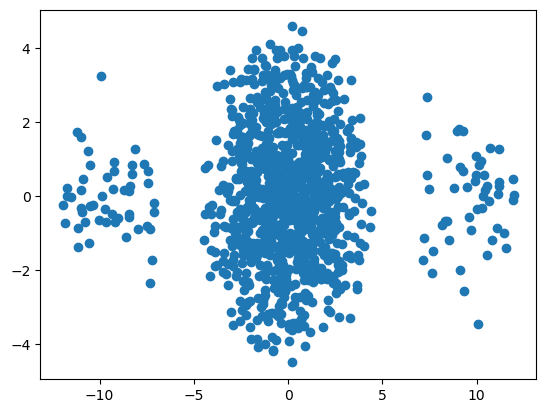

In [9]:
Xaxis=np.r_[X_train,X_xaxis]
plt.plot(Xaxis[:,0],Xaxis[:,1],'o')

In [10]:
y_train = np.zeros(X_train.shape[0])
y_test = np.ones(X_xaxis.shape[0])
y=np.concatenate((y_train,y_test))

In [15]:
X=np.c_[Xaxis,y]
df=pd.DataFrame(X)
df=df.rename(columns={6:'Target'})
df.head()

,0,1,2,3,4,5,Target
0,-0.731186,-1.385350,-0.178168,-1.833251,-3.261717,0.252484,0.0
1,3.208072,0.071575,-0.147956,0.871928,1.557336,1.766276,0.0
2,3.306013,1.360201,2.452319,1.258482,-0.176678,-1.281672,0.0
3,0.523361,-0.453477,1.757587,2.057864,1.908394,2.106112,0.0
4,3.328303,3.136135,-1.148419,-0.113742,0.015016,-0.966332,0.0


# Generate Dataset for Time Scaling Experiments

## Fix features and vary sample size

In [29]:
for sample_size in [500,1000,2500,5000,10000,25000,50000,100000,250000,300000]:
    generate_dataset(size=sample_size)

In [10]:
basepath=os.path.dirname(os.getcwd())
generate_dataset(path=os.path.join(basepath,'data','syn'),size=1000)

In [6]:
data=pd.read_csv('/home/davide_frizzo/ExIFFI/data/syn/Xaxis_10000_6.csv')
data=data.drop(columns='Unnamed: 0')
data.head()

,0,1,2,3,4,5,Target
0,-2.699068,-0.054638,0.022825,-3.431084,0.480100,-0.886545,0.0
1,-0.886592,0.892133,-2.284010,2.198627,-1.350873,0.974865,0.0
2,2.204669,-0.313093,-1.819416,-1.429811,-1.764278,-0.119292,0.0
3,0.307564,-0.549775,-0.153954,-2.588584,-3.037643,-0.251356,0.0
4,1.387520,2.711756,0.324122,0.324690,2.430793,-0.060373,0.0


In [7]:
data.shape

(11000, 7)

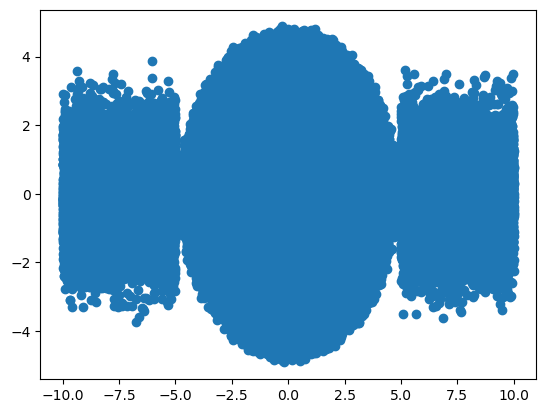

In [32]:
plt.plot(data.iloc[:,0],data.iloc[:,1],'o')

## Fix sample size and vary features

In [8]:
generate_dataset(size=1000,dimensions=10)

In [3]:
data_syn_feat_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/syn_feat/'

In [4]:
data=pd.read_csv(data_syn_feat_path+'Xaxis_1000_10.csv')
data=data.drop(columns='Unnamed: 0')
data.head()

,0,1,2,3,4,5,6,7,8,9,Target
0,-0.947383,1.298222,2.106969,-2.120516,0.750349,-1.835661,0.353889,1.795541,-0.723493,2.026798,0.0
1,0.068239,1.256996,0.524336,-1.173714,-0.320447,-1.423139,-2.035327,0.063976,-2.767341,-1.916504,0.0
2,1.912084,1.201034,2.352559,1.810631,0.962318,-1.313263,-0.469281,0.799565,1.676829,0.631531,0.0
3,-0.756188,0.546995,2.173359,0.235335,-0.277999,0.374986,0.419395,-1.794954,-2.372650,1.149446,0.0
4,-0.509884,0.565009,-2.175900,-0.571867,2.784556,-0.625609,0.519313,0.938944,0.147525,-3.064695,0.0


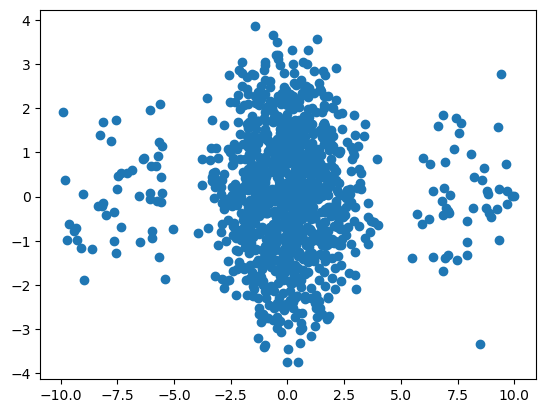

In [5]:
plt.plot(data.iloc[:,0],data.iloc[:,1],'o')

### Random datasets from 16 to 4096 features

In [14]:
n_feat=[2**i for i in range(4,13)]
for feat in n_feat:
    data = np.random.normal(0,1,size=(5000,feat))
    y = np.random.randint(2, size=(5000,1))
    data=np.c_[data,y]
    df=pd.DataFrame(data)
    df=df.rename(columns={feat:'Target'})
    df.to_csv(f'{data_syn_feat_path}Xaxis_5000_{feat}.csv')

Generate random dataset for 18 and 20 features

18 features

In [2]:
import numpy as np
import pandas as pd
data = np.random.normal(0,1,size=(1000,18))
#Generate a random array of 0 and 1 with shape (1000,1)
y = np.random.randint(2, size=(1000,1))
data=np.c_[data,y]
df=pd.DataFrame(data)
df=df.rename(columns={18:'Target'})
#Save df to a csv file called Xaxis_1000_18.csv in the folder /home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/
df.to_csv('/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/Xaxis_1000_18.csv')

In [20]:
data=pd.read_csv('/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/Xaxis_1000_18.csv')
data=data.drop(columns='Unnamed: 0')
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Target
0,-0.350495,-1.043795,0.939806,0.778675,-0.644053,-1.866473,-1.353973,0.024323,0.958952,0.770027,0.375787,-2.335592,0.255021,-0.455691,0.349989,0.117173,0.235787,1.402915,0.0
1,0.118499,0.179668,2.166097,-1.460028,-2.694029,0.435338,0.146476,1.479692,-0.716691,-1.281779,-0.093461,-1.031020,-0.479135,-0.328500,1.036704,-0.713893,1.184764,-0.365264,1.0
2,0.375880,0.722897,0.207306,-1.874196,-2.109003,1.791789,-1.104014,-0.496540,-0.402929,0.833896,-0.556933,0.563884,0.759711,-0.127371,1.399319,0.118329,-0.226494,-0.976502,1.0
3,0.252024,-0.592554,1.195771,-1.261902,-0.336687,-0.287827,0.563846,0.088952,-0.811556,-0.458520,2.434710,-0.853428,0.894733,-0.331478,-0.311112,0.446321,0.369116,-1.672265,0.0
4,-0.097859,3.073077,-0.985290,-1.230930,0.160668,1.660818,-0.079762,-1.453311,-1.185214,0.891899,-1.945338,0.448473,-2.289508,-1.334348,-1.338584,-2.314791,-0.333669,1.678240,0.0


20 features

In [1]:
data = np.random.normal(0,1,size=(1000,20))
#Generate a random array of 0 and 1 with shape (1000,1)
y = np.random.randint(2, size=(1000,1))
data=np.c_[data,y]
df=pd.DataFrame(data)
df=df.rename(columns={20:'Target'})
df.to_csv('/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/Xaxis_1000_20.csv')

NameError: name 'np' is not defined

40 features

In [3]:
data = np.random.normal(0,1,size=(1000,40))
#Generate a random array of 0 and 1 with shape (1000,1)
y = np.random.randint(2, size=(1000,1))
data=np.c_[data,y]
df=pd.DataFrame(data)
df=df.rename(columns={40:'Target'})
df.to_csv('/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/syn_feat/Xaxis_1000_40.csv')

80 features

In [ ]:
data = np.random.normal(0,1,size=(1000,80))
#Generate a random array of 0 and 1 with shape (1000,1)
y = np.random.randint(2, size=(1000,1))
data=np.c_[data,y]
df=pd.DataFrame(data)
df=df.rename(columns={80:'Target'})
df.to_csv('/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/syn_feat/Xaxis_1000_80.csv')

In [22]:
data=pd.read_csv('/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/Xaxis_1000_18.csv')
data=data.drop(columns='Unnamed: 0')
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Target
0,-0.350495,-1.043795,0.939806,0.778675,-0.644053,-1.866473,-1.353973,0.024323,0.958952,0.770027,0.375787,-2.335592,0.255021,-0.455691,0.349989,0.117173,0.235787,1.402915,0.0
1,0.118499,0.179668,2.166097,-1.460028,-2.694029,0.435338,0.146476,1.479692,-0.716691,-1.281779,-0.093461,-1.031020,-0.479135,-0.328500,1.036704,-0.713893,1.184764,-0.365264,1.0
2,0.375880,0.722897,0.207306,-1.874196,-2.109003,1.791789,-1.104014,-0.496540,-0.402929,0.833896,-0.556933,0.563884,0.759711,-0.127371,1.399319,0.118329,-0.226494,-0.976502,1.0
3,0.252024,-0.592554,1.195771,-1.261902,-0.336687,-0.287827,0.563846,0.088952,-0.811556,-0.458520,2.434710,-0.853428,0.894733,-0.331478,-0.311112,0.446321,0.369116,-1.672265,0.0
4,-0.097859,3.073077,-0.985290,-1.230930,0.160668,1.660818,-0.079762,-1.453311,-1.185214,0.891899,-1.945338,0.448473,-2.289508,-1.334348,-1.338584,-2.314791,-0.333669,1.678240,0.0


## Bisect Anomalies

Changing the input parameter d it's possible to choose the dimensionality of the bisect anomaly. The values of d used in the paper were d=2,3,6.

In [12]:
def bisect(size,min,max,d,dim=6):
    data=np.zeros(shape=(size,dim))
    data[:,0]=np.random.uniform(min,max,size=size)
    for i in range(1,d):
        data[:,i]=data[:,0]+np.random.normal(0,1,size=size)

    for i in range(d,dim):
        data[:,i]=np.random.normal(0,1,size=size)

    return data

In [10]:
X_bisect=np.row_stack((bisect(50,5,10,2),bisect(50,-10,-5,2)))
X_bisect_3d=np.row_stack((bisect(50,5,10,3),bisect(50,-10,-5,3)))
X_bisect_4d=np.row_stack((bisect(50,5,10,4),bisect(50,-10,-5,4)))
X_bisect_6d=np.row_stack((bisect(50,5,10,6),bisect(50,-10,-5,6)))

In [25]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data\\diffi_data')
os.getcwd()

'c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data\\diffi_data'

In [11]:
d={
    'X_xaxis': X_xaxis,
    'X_yaxis': X_yaxis,
    'X_bisect': X_bisect,
    'X_bisect_3d': X_bisect_3d,
    'X_bisect_6d': X_bisect_6d
}

file_to_read = os.getcwd()+'\\syn_test_anomaly_interval_5_10.pkl'
with open(file_to_read, 'wb') as file:
    pickle.dump(d,file)

## Bisect Prop Anomalies

Let's generate the new `bisect_prop` synthetic dataset that has the same structure of `bisect_3d` but with the three anomalous features with different proportions of anomalies. So for example one feature has anomalies spread in the interval $[2,4]$, the second one in $[2,6]$ and the third one in $[2,8]$.

Let's use these anomaly intervals

In [11]:
anomaly_interval=[7,12]
anomaly_interval_2=[np.sqrt(49/8),np.sqrt(144/2)]
print(f'Anomaly interval 2: {anomaly_interval_2}')
anomaly_interval_3=[np.sqrt(49/8),np.sqrt(144/3)]
print(f'Anomaly interval 3: {anomaly_interval_3}')
anomaly_interval_6=[np.sqrt(49/8),np.sqrt(144/6)]
print(f'Anomaly interval 6: {anomaly_interval_6}')

Anomaly interval 2: [2.4748737341529163, 8.48528137423857]
Anomaly interval 3: [2.4748737341529163, 6.928203230275509]
Anomaly interval 6: [2.4748737341529163, 4.898979485566356]


And their negative versions

In [30]:
anomaly_interval_2_neg=[-anomaly_interval_2[1],-anomaly_interval_2[0]]
print(f'Anomaly interval 2 negative: {anomaly_interval_2_neg}')
anomaly_interval_3_neg=[-anomaly_interval_3[1],-anomaly_interval_3[0]]
print(f'Anomaly interval 3 negative: {anomaly_interval_3_neg}')
anomaly_interval_6_neg=[-anomaly_interval_6[1],-anomaly_interval_6[0]]
print(f'Anomaly interval 6 negative: {anomaly_interval_6_neg}')

Anomaly interval 2 negative: [-8.48528137423857, -2.4748737341529163]
Anomaly interval 3 negative: [-6.928203230275509, -2.4748737341529163]
Anomaly interval 6 negative: [-4.898979485566356, -2.4748737341529163]


In [31]:
def bisect_prop(size,an_int1,an_int2,an_int3,dim=6):
    data=np.zeros(shape=(size,dim))
    for i,interval in enumerate([an_int1,an_int2,an_int3]):
        data[:,i]=np.random.uniform(interval[0],interval[1],size=size)

    for i in range(3,dim):
        data[:,i]=np.random.normal(0,1,size=size)

    return data

Compare `bisect_3d` and `bisect_prop` datasets

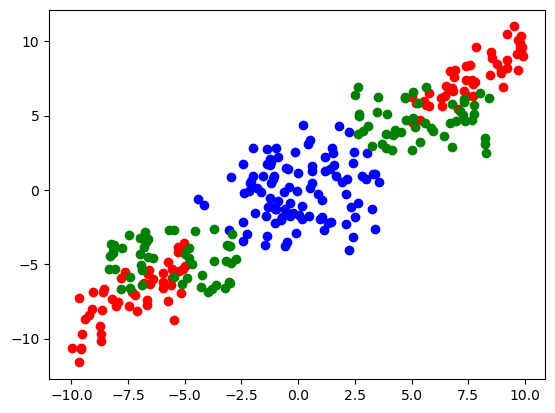

In [32]:
X_train=np.array(generate_random_points_in_ball(100,6,5))
X_bisect_3d=np.row_stack((bisect(50,5,10,3),bisect(50,-10,-5,3)))
X_bisect_prop=np.row_stack((bisect_prop(50,anomaly_interval_2,anomaly_interval_3,anomaly_interval_6),bisect_prop(50,anomaly_interval_2_neg,anomaly_interval_3_neg,anomaly_interval_6_neg)))
X=np.r_[X_train,X_bisect_3d]
plt.plot(X_train[:,0],X_train[:,1],'o',color='blue')
plt.plot(X_bisect_3d[:,0],X_bisect_3d[:,1],'o',color='red')
plt.plot(X_bisect_prop[:,0],X_bisect_prop[:,1],'o',color='green')

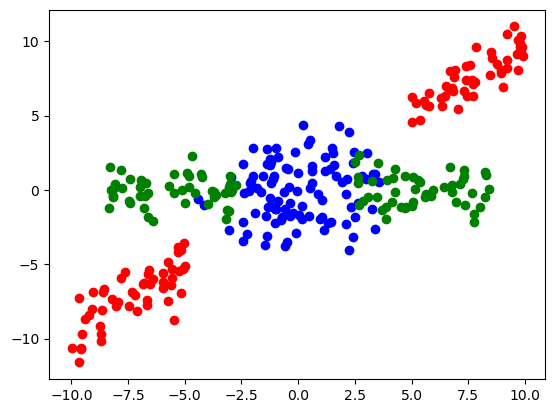

In [34]:
plt.plot(X_train[:,0],X_train[:,1],'o',color='blue')
plt.plot(X_bisect_3d[:,0],X_bisect_3d[:,1],'o',color='red')
plt.plot(X_bisect_prop[:,0],X_bisect_prop[:,3],'o',color='green')

### Create the `bisect_prop.csv` dataset

In [42]:
X_train=np.array(generate_random_points_in_ball(1000,6,5))
X_bisect_prop=np.row_stack((bisect_prop(50,anomaly_interval_2,anomaly_interval_3,anomaly_interval_6),bisect_prop(50,anomaly_interval_2_neg,anomaly_interval_3_neg,anomaly_interval_6_neg)))
X_prop=np.r_[X_train,X_bisect_prop]
y_train = np.zeros(X_train.shape[0])
y_test = np.ones(X_bisect_prop.shape[0])
y=np.concatenate((y_train,y_test))
X=np.c_[X_prop,y]
df=pd.DataFrame(X)
df.rename(columns={6:'Target'})

,0,1,2,3,4,5,Target
0,-1.128346,-3.670227,1.452460,1.052106,1.218191,-1.493301,0.0
1,0.198151,3.103561,1.029927,2.930145,1.064439,-1.751617,0.0
2,0.555370,-1.377599,0.151017,-1.659420,2.635515,1.459347,0.0
3,-0.102787,-0.324976,2.330638,0.566567,-2.362601,-0.903236,0.0
4,-0.326901,0.023313,-3.333337,-0.273764,2.971939,-1.629743,0.0
...,...,...,...,...,...,...,...
1095,-2.607399,-5.595852,-4.095052,-0.084516,0.972328,0.467689,1.0
1096,-2.722886,-4.478490,-3.950548,-1.114125,-0.533334,0.682732,1.0
1097,-3.596413,-5.646301,-4.138444,-1.061521,0.074202,0.534309,1.0
1098,-6.868305,-3.139551,-3.579091,-1.209993,-0.168966,-0.244335,1.0


In [44]:
data_path_prop=os.path.join(basepath,'data','syn','bisect_3d_prop.csv')
df.to_csv(data_path_prop)

In [46]:
basepath=os.path.dirname(os.getcwd())
data_path=os.path.join(basepath,'data','syn','bisect_3d_prop.csv')
data=pd.read_csv(data_path)
data=data.drop(columns='Unnamed: 0')
data.head()

,0,1,2,3,4,5,Target
0,-1.128346,-3.670227,1.452460,1.052106,1.218191,-1.493301,0.0
1,0.198151,3.103561,1.029927,2.930145,1.064439,-1.751617,0.0
2,0.555370,-1.377599,0.151017,-1.659420,2.635515,1.459347,0.0
3,-0.102787,-0.324976,2.330638,0.566567,-2.362601,-0.903236,0.0
4,-0.326901,0.023313,-3.333337,-0.273764,2.971939,-1.629743,0.0


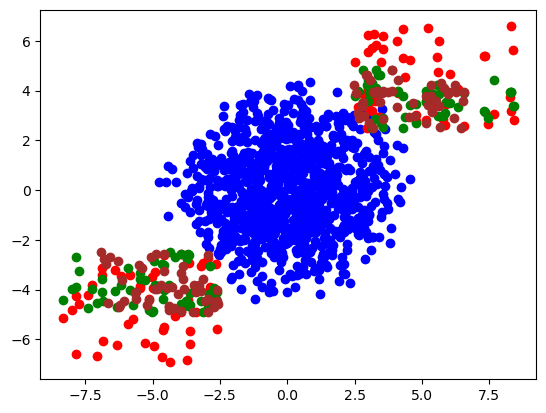

In [52]:
X_in=data[data['Target']==0]
X_out=data[data['Target']==1]
plt.plot(X_in.iloc[:,0],X_in.iloc[:,1],'o',color='blue')
plt.plot(X_out.iloc[:,0],X_out.iloc[:,1],'o',color='red')
plt.plot(X_out.iloc[:,0],X_out.iloc[:,2],'o',color='green')
plt.plot(X_out.iloc[:,1],X_out.iloc[:,2],'o',color='brown')